# Training Results Analysis

In [21]:
import os
import csv
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

In [22]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/FML Project') 

## Random Guesser

In [3]:
label_path = sys.path[-1]+"/Data/labels.npy"

In [4]:
labels = np.load(label_path)
print('Labels loaded!')

Labels loaded!


In [5]:
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef, confusion_matrix

def compute_accuracy(y_true, y_pred):
    assert (len(y_true) == len(y_pred))
    return accuracy_score(np.array(y_true), np.array(y_pred))

def compute_f1(y_true, y_pred):
    assert (len(y_true) == len(y_pred))
    return f1_score(np.array(y_true), np.array(y_pred))

def compute_MCC(y_true, y_pred):
    assert (len(y_true) == len(y_pred))
    return matthews_corrcoef(np.array(y_true), np.array(y_pred))

def evaluate_metrics(preds, labels):
    labels = [int(item) for item in labels]
    preds = [0 if item < 0.5 else 1 for item in preds]
    accuracy = compute_accuracy(labels, preds)
    f1 = compute_f1(labels, preds)
    mcc = compute_MCC(labels, preds)
    cm = confusion_matrix(labels, preds)
    return accuracy, f1, mcc, cm

In [7]:
acc, f1, mcc, cm = [], [], [], []

for i in range(5):

    preds = np.random.choice([0,1], size=len(labels), replace=True, p=[0.5, 0.5])
    metrics = evaluate_metrics(preds, labels)
    acc.append(metrics[0])
    f1.append(metrics[1])
    mcc.append(metrics[2])
    cm.append(metrics[3])

In [10]:
print('Random')
print(25*'-')
print("Accuracy : {:.3f} ± {:.3f}".format(np.mean(acc), np.std(acc)))
print("F1-Score : {:.3f} ± {:.3f}".format(np.mean(f1), np.std(f1)))
print("MCC Score: {:.3f} ± {:.3f}".format(np.mean(mcc), np.std(mcc)))

Random
-------------------------
Accuracy : 0.499 ± 0.003
F1-Score : 0.504 ± 0.002
MCC Score: -0.002 ± 0.007


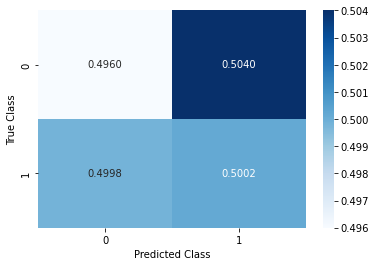

In [11]:
import seaborn as sns

cm = np.sum(cm[1:], axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".4f", cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [16]:
model_name = 'Text_Image_SA'
acc, f1, mcc, cm = load_results(model_name)

print('Text_Image_SA')
print(25*'-')
print("Accuracy : {:.3f} ± {:.3f}".format(np.mean(acc), np.std(acc)))
print("F1-Score : {:.3f} ± {:.3f}".format(np.mean(f1), np.std(f1)))
print("MCC Score: {:.3f} ± {:.3f}".format(np.mean(mcc), np.std(mcc)))

Text_Image_SA
-------------------------
Accuracy : 0.525 ± 0.010
F1-Score : 0.558 ± 0.091
MCC Score: 0.044 ± 0.009


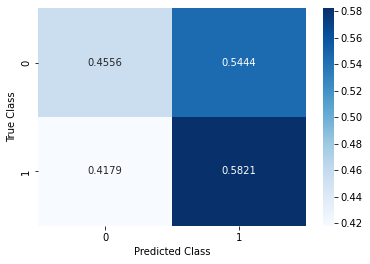

In [17]:
cm = np.sum(cm[1:], axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".4f", cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [18]:
model_name = 'Text_Image_SA2'
acc, f1, mcc, cm = load_results(model_name)

print('Text_Image_SA2')
print(25*'-')
print("Accuracy : {:.3f} ± {:.3f}".format(np.mean(acc), np.std(acc)))
print("F1-Score : {:.3f} ± {:.3f}".format(np.mean(f1), np.std(f1)))
print("MCC Score: {:.3f} ± {:.3f}".format(np.mean(mcc), np.std(mcc)))

Text_Image_SA2
-------------------------
Accuracy : 0.522 ± 0.011
F1-Score : 0.525 ± 0.079
MCC Score: 0.047 ± 0.012


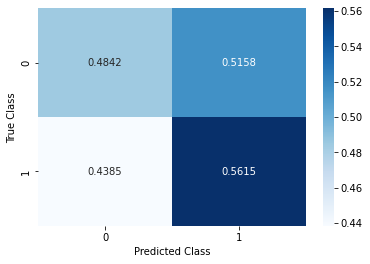

In [19]:
cm = np.sum(cm[1:], axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".4f", cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## Evaluation Metrics

In [26]:
headers = ['Model', 'Accuracy', 'F1-Score', 'MCC Score']

data = [['Random', 
         "{:.3f} ± {:.3f}".format(0.499, 0.003),
         "{:.3f} ± {:.3f}".format(0.504, 0.002),
         "{:.3f} ± {:.3f}".format(-0.002, 0.007)],
        ['ARIMA', 
         "{:.3f} ± {:.3f}".format(0.513, 0.003),
         "{:.3f} ± {:.3f}".format(0.514, 0.003),
         "{:.3f} ± {:.3f}".format(-0.021, 0.003)],
        [' ',' ',' ',' '],
        ['Image-CNN', 
         "{:.3f} ± {:.3f}".format(0.509, 0.011),
         "{:.3f} ± {:.3f}".format(0.515, 0.091),
         "{:.3f} ± {:.3f}".format(0.017, 0.011)],
        ['Image-SEE', 
         "{:.3f} ± {:.3f}".format(0.529, 0.004),
         "{:.3f} ± {:.3f}".format(0.619, 0.050),
         "{:.3f} ± {:.3f}".format(0.044, 0.007)],
        ['Text-SEE', 
         "{:.3f} ± {:.3f}".format(0.523, 0.005),
         "{:.3f} ± {:.3f}".format(0.642, 0.033),
         "{:.3f} ± {:.3f}".format(0.021, 0.008)],
        [' ',' ',' ',' '],
        ['Text-SA', 
         "{:.3f} ± {:.3f}".format(0.523, 0.003),
         "{:.3f} ± {:.3f}".format(0.565, 0.016),
         "{:.3f} ± {:.3f}".format(0.015, 0.010)],
        ['Text-Image-SA', 
         "{:.3f} ± {:.3f}".format(0.525, 0.010),
         "{:.3f} ± {:.3f}".format(0.558, 0.091),
         "{:.3f} ± {:.3f}".format(0.044, 0.009)],
        ['Text-Image-SA-LSP', 
         "{:.3f} ± {:.3f}".format(0.522, 0.011),
         "{:.3f} ± {:.3f}".format(0.525, 0.079),
         "{:.3f} ± {:.3f}".format(0.047, 0.012)],
        ['Text-Image-SA-EHP', 
         "{:.3f} ± {:.3f}".format(0.530, 0.009),
         "{:.3f} ± {:.3f}".format(0.602, 0.058),
         "{:.3f} ± {:.3f}".format(0.048, 0.009)],
        ['Text-Image-SA-LHP', 
         "{:.3f} ± {:.3f}".format(0.520, 0.003),
         "{:.3f} ± {:.3f}".format(0.592, 0.043),
         "{:.3f} ± {:.3f}".format(0.024, 0.008)],
        [' ',' ',' ',' '],
        ['Text-Image-CA', 
         "{:.3f} ± {:.3f}".format(0.518, 0.006),
         "{:.3f} ± {:.3f}".format(0.585, 0.060),
         "{:.3f} ± {:.3f}".format(0.027, 0.008)],
        ['Text-Image-CA2', 
         "{:.3f} ± {:.3f}".format(0.523, 0.010),
         "{:.3f} ± {:.3f}".format(0.646, 0.059),
         "{:.3f} ± {:.3f}".format(0.026, 0.014)],
        ['Text-Image-CA2-LSP', 
         "{:.3f} ± {:.3f}".format(0.524, 0.008),
         "{:.3f} ± {:.3f}".format(0.605, 0.061),
         "{:.3f} ± {:.3f}".format(0.033, 0.015)],
        ['Text-Image-CA2-LHP', 
         "{:.3f} ± {:.3f}".format(0.523, 0.007),
         "{:.3f} ± {:.3f}".format(0.616, 0.053),
         "{:.3f} ± {:.3f}".format(0.031, 0.009)],
        [' ',' ',' ',' '],
        ['Text-Image-Transformer', 
         "{:.3f} ± {:.3f}".format(0.519, 0.010),
         "{:.3f} ± {:.3f}".format(0.571, 0.077),
         "{:.3f} ± {:.3f}".format(0.030, 0.011)],
        ['Text-Image-Transformer-EHP', 
         "{:.3f} ± {:.3f}".format(0.528, 0.005),
         "{:.3f} ± {:.3f}".format(0.614, 0.036),
         "{:.3f} ± {:.3f}".format(0.041, 0.009)],
        ['Text-Image-Transformer2', 
         "{:.3f} ± {:.3f}".format(0.524, 0.006),
         "{:.3f} ± {:.3f}".format(0.585, 0.053),
         "{:.3f} ± {:.3f}".format(0.038, 0.011)],
        ['Text-Image-Transformer2-LSP', 
         "{:.3f} ± {:.3f}".format(0.529, 0.002),
         "{:.3f} ± {:.3f}".format(0.638, 0.048),
         "{:.3f} ± {:.3f}".format(0.043, 0.007)],
        ['Text-Image-Transformer2-LHP', 
         "{:.3f} ± {:.3f}".format(0.528, 0.007),
         "{:.3f} ± {:.3f}".format(0.637, 0.064),
         "{:.3f} ± {:.3f}".format(0.039, 0.009)],
         ]

print(tabulate(data, headers=headers, tablefmt='orgtbl', stralign="right"))

|                       Model |      Accuracy |      F1-Score |      MCC Score |
|-----------------------------+---------------+---------------+----------------|
|                      Random | 0.499 ± 0.003 | 0.504 ± 0.002 | -0.002 ± 0.007 |
|                       ARIMA | 0.513 ± 0.003 | 0.514 ± 0.003 | -0.021 ± 0.003 |
|                             |               |               |                |
|                   Image-CNN | 0.509 ± 0.011 | 0.515 ± 0.091 |  0.017 ± 0.011 |
|                   Image-SEE | 0.529 ± 0.004 | 0.619 ± 0.050 |  0.044 ± 0.007 |
|                    Text-SEE | 0.523 ± 0.005 | 0.642 ± 0.033 |  0.021 ± 0.008 |
|                             |               |               |                |
|                     Text-SA | 0.523 ± 0.003 | 0.565 ± 0.016 |  0.015 ± 0.010 |
|               Text-Image-SA | 0.525 ± 0.010 | 0.558 ± 0.091 |  0.044 ± 0.009 |
|           Text-Image-SA-LSP | 0.522 ± 0.011 | 0.525 ± 0.079 |  0.047 ± 0.012 |
|           Text-Image-SA-EH

## Confusion Matrices

In [32]:
metrics_ca2_sp = []
for i in range(1,6):
    test = sys.path[-1]+f"/Training Results/test_metrics_Text_Image_CA3_0{i}.pkl"
    with open(test, 'rb') as f:
        test_metrics_sa = pickle.load(f)
    metrics_ca2_sp.append([metrics_ca2_sp, test_metrics_sa])

model_name = 'Text_Image_CA3'

In [13]:
def load_results(model_name):
    acc, f1, mcc, cm = [], [], [], []
    for i in range(1,6):
        valid = sys.path[-1]+f"/Training Results/valid_metrics_{model_name}_0{i}.pkl"
        test = sys.path[-1]+f"/Training Results/test_metrics_{model_name}_0{i}.pkl"
        with open(valid, 'rb') as f:
            valid_metrics = pickle.load(f)
        with open(test, 'rb') as f:
            test_metrics = pickle.load(f)
        idx = np.argmax(test_metrics['mcc'])
        acc.append(test_metrics['acc'][idx])
        f1.append(test_metrics['f1'][idx])
        mcc.append(test_metrics['mcc'][idx])
        cm.append(test_metrics['cm'][idx])
    return acc, f1, mcc, cm

In [45]:
model_name = 'Image_SSE'
acc_Image_SSE, f1_Image_SSE, mcc_Image_SSE, cm_Image_SSE = load_results(model_name)
model_name = 'Text_SSE'
acc_Text_SSE, f1_Text_SSE, mcc_Text_SSE, cm_Text_SSE = load_results(model_name)

model_name = 'Text_SA'
acc_Text_SA, f1_Text_SA, mcc_Text_SA, cm_Text_SA = load_results(model_name)
model_name = 'Text_Image_CA4'
acc_Text_Image_SA_EHP, f1_Text_Image_SA_EHP, mcc_Text_Image_SA_EHP, cm_Text_Image_SA_EHP = load_results(model_name)
model_name = 'Text_Image_CA5'
acc_Text_Image_SA_LHP, f1_Text_Image_SA_LHP, mcc_Text_Image_SA_LHP, cm_Text_Image_SA_LHP = load_results(model_name)

model_name = 'Text_Image_CA2'
acc_CA2, f1_CA2, mcc_CA2, cm_CA2 = load_results(model_name)
model_name = 'Text_Image_CA3'
acc_CA2_SP, f1_CA2_SP, mcc_CA2_SP, cm_CA2_SP = load_results(model_name)
model_name = 'Text_Image_CA6'
acc_CA2_LHP, f1_CA2_LHP, mcc_CA2_LHP, cm_CA2_LHP = load_results(model_name)

model_name = 'Text_Image_Transformer2'
acc_Text_Image_T, f1_Text_Image_T, mcc_Text_Image_T, cm_Text_Image_T = load_results(model_name)
model_name = 'Text_Image_Transformer3'
acc_Text_Image_T_SP, f1_Text_Image_T_SP, mcc_Text_Image_T_SP, cm_Text_Image_T_SP = load_results(model_name)
model_name = 'Text_Image_Transformer4'
acc_Text_Image_T_LHP, f1_Text_Image_T_LHP, mcc_Text_Image_T_LHP, cm_Text_Image_T_LHP = load_results(model_name)

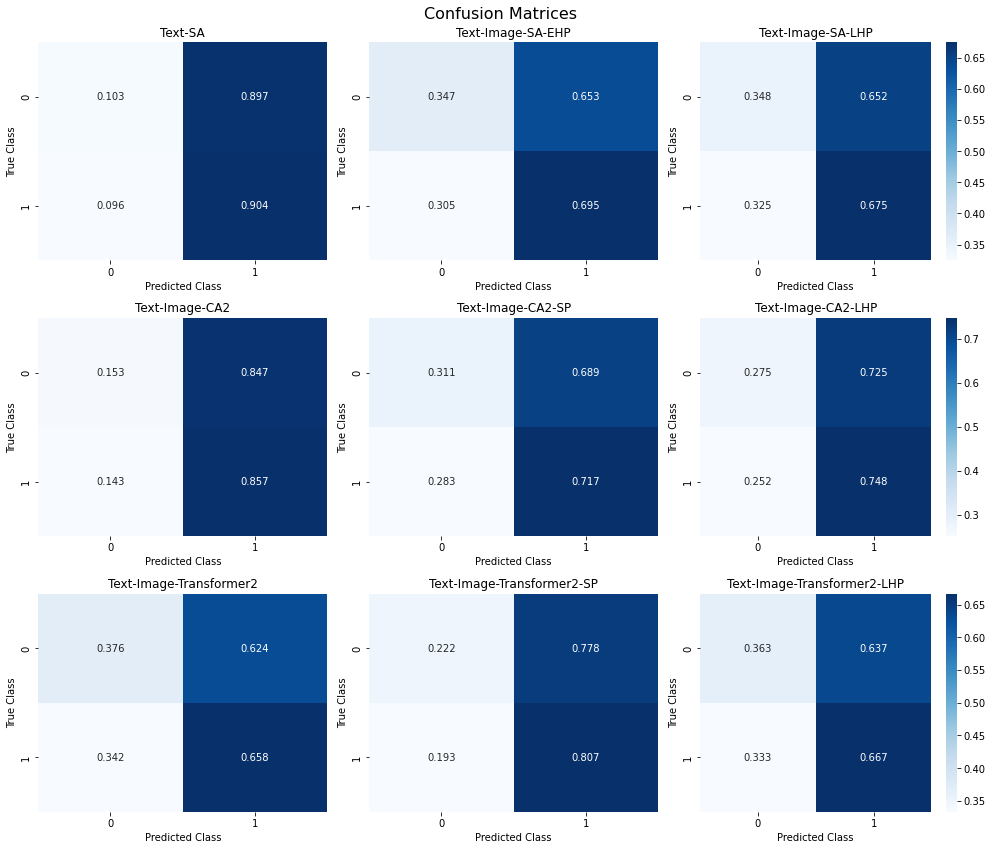

In [54]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

cm = np.sum(cm_Text_SA, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[0][0])
axs[0][0].set_title('Text-SA')
axs[0][0].set_ylabel('True Class')
axs[0][0].set_xlabel('Predicted Class')

cm = np.sum(cm_Text_Image_SA_EHP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[0][1])
axs[0][1].set_title('Text-Image-SA-EHP')
axs[0][1].set_ylabel('True Class')
axs[0][1].set_xlabel('Predicted Class')

cm = np.sum(cm_Text_Image_SA_LHP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', ax=axs[0][2])
axs[0][2].set_title('Text-Image-SA-LHP')
axs[0][2].set_ylabel('True Class')
axs[0][2].set_xlabel('Predicted Class')

cm = np.sum(cm_CA2, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[1][0])
axs[1][0].set_title('Text-Image-CA2')
axs[1][0].set_ylabel('True Class')
axs[1][0].set_xlabel('Predicted Class')

cm = np.sum(cm_CA2_SP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[1][1])
axs[1][1].set_title('Text-Image-CA2-SP')
axs[1][1].set_ylabel('True Class')
axs[1][1].set_xlabel('Predicted Class')

cm = np.sum(cm_CA2_LHP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', ax=axs[1][2])
axs[1][2].set_title('Text-Image-CA2-LHP')
axs[1][2].set_ylabel('True Class')
axs[1][2].set_xlabel('Predicted Class')

cm = np.sum(cm_Text_Image_T, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[2][0])
axs[2][0].set_title('Text-Image-Transformer2')
axs[2][0].set_ylabel('True Class')
axs[2][0].set_xlabel('Predicted Class')

cm = np.sum(cm_Text_Image_T_SP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', cbar=False, ax=axs[2][1])
axs[2][1].set_title('Text-Image-Transformer2-SP')
axs[2][1].set_ylabel('True Class')
axs[2][1].set_xlabel('Predicted Class')

cm = np.sum(cm_Text_Image_T_LHP, axis=0)
normalized_cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(normalized_cm, annot=True, fmt=".3f", cmap='Blues', ax=axs[2][2])
axs[2][2].set_title('Text-Image-Transformer2-LHP')
axs[2][2].set_ylabel('True Class')
axs[2][2].set_xlabel('Predicted Class')


fig.suptitle('Confusion Matrices', fontsize=16)
plt.tight_layout()
plt.show()